# ============================================
# 📘 FOOTBALL LEAGUE MODEL BUILDING - JUPYTER 
# ============================================

### 1. IMPORT LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

print("Libraries loaded successfully!")

Libraries loaded successfully!



### 2. LOAD DATASET


In [3]:

df = pd.read_csv('D:\\VISUAL_PROJECT_1\\football_data\\premier_league_table_13.csv')
df.head()

,Team,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points
0,Arsenal,13,9,3,1,25,7,18,30
1,Manchester City,13,8,1,4,27,12,15,25
2,Chelsea,13,7,3,3,24,12,12,24
3,Aston Villa,13,7,3,3,16,11,5,24
4,Brighton & Hove Albion,13,6,4,3,21,16,5,22



### 3. CHECK DATA INFO


In [4]:

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team             20 non-null     object
 1   Played           20 non-null     int64 
 2   Won              20 non-null     int64 
 3   Drawn            20 non-null     int64 
 4   Lost             20 non-null     int64 
 5   Goals For        20 non-null     int64 
 6   Goals Against    20 non-null     int64 
 7   Goal Difference  20 non-null     int64 
 8   Points           20 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.5+ KB
None
       Played        Won      Drawn       Lost  Goals For  Goals Against  \
count    20.0  20.000000  20.000000  20.000000  20.000000      20.000000   
mean     13.0   5.200000   2.600000   5.200000  18.000000      18.000000   
std       0.0   2.067289   1.231174   2.462348   4.790341       6.043701   
min      13.0   0.000000   0.000000   1.0000

### 4. EXPLORATORY DATA ANALYSIS

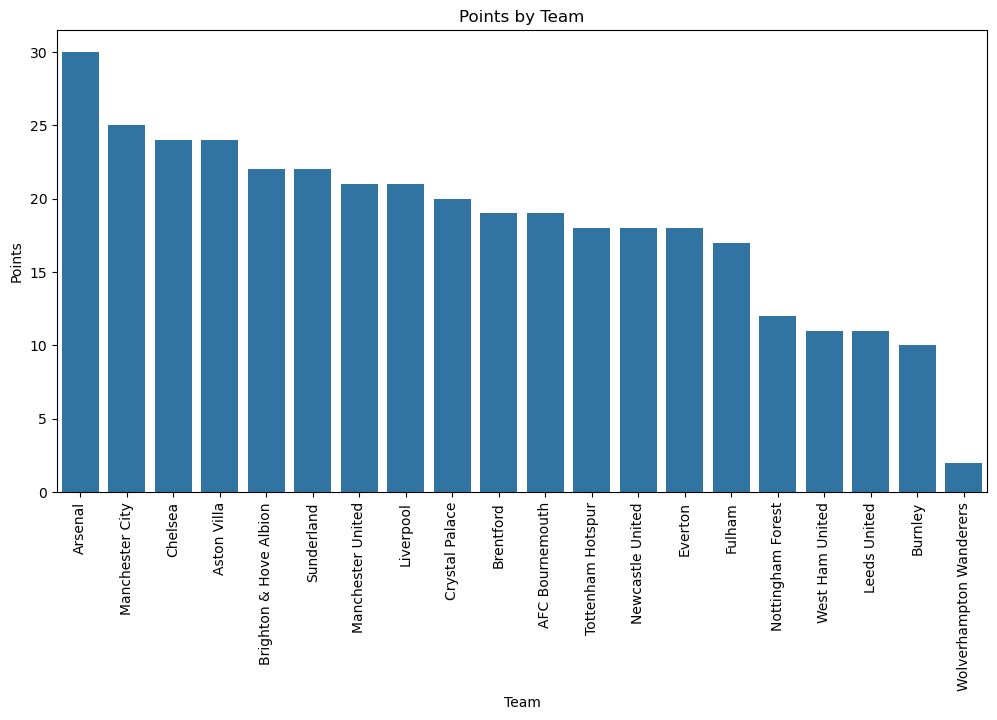

In [5]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Team'], y=df['Points'])
plt.xticks(rotation=90)
plt.title("Points by Team")
plt.show()

### 5. FEATURE ENGINEERING

In [6]:
df['GF_per_game'] = df['Goals For'] / df['Played']
df['GA_per_game'] = df['Goals Against'] / df['Played']
df['Win_pct'] = df['Won'] / df['Played']
df['GD_per_game'] = df['Goal Difference'] / df['Played']

features = [
    'Played','Won','Drawn','Lost','Goals For','Goals Against','Goal Difference',
    'GF_per_game','GA_per_game','Win_pct','GD_per_game'
]

target = 'Points'

X = df[features]
y = df[target]


### 6. TRAIN-TEST SPLIT

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train/Test split done!")

Train/Test split done!


### 7. SCALING

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed!")

Scaling completed!


### 8. MODEL TRAINING

In [9]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model.fit(X_train_scaled, y_train)
print("Model training completed!")


Model training completed!


### 9. MODEL EVALUATION

In [10]:
y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("RMSE:", rmse)
print("R2 Score:", r2)


Model Evaluation:
RMSE: 3.635166204361684
R2 Score: 0.8035028500619579


### 10. SAVE PICKLE FILES

In [11]:
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Saved model.pkl and scaler.pkl successfully!")


Saved model.pkl and scaler.pkl successfully!


### 11. PREDICTION FUNCTION

In [12]:
def predict_points(Played, Won, Drawn, Lost, GF, GA, GD):
    data = np.array([[Played, Won, Drawn, Lost, GF, GA, GD,
                      GF/Played, GA/Played, Won/Played, GD/Played]])
    
    data_scaled = scaler.transform(data)
    prediction = model.predict(data_scaled)
    return prediction[0]

# Example prediction
print("\nExample Prediction:")
print(predict_points(13, 9, 1, 3, 25, 12, 13))



Example Prediction:
23.376666666666665


c:\Users\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 12. How to Unpickle a File (Load a Saved Model)

In [13]:
# Use model and scaler from the notebook if available; otherwise load from disk
try:
    model  # check if model exists in globals()
except NameError:
    with open("model.pkl", "rb") as file:
        model = pickle.load(file)

try:
    scaler  # check if scaler exists in globals()
except NameError:
    with open("scaler.pkl", "rb") as file:
        scaler = pickle.load(file)

# Provide base stats (Played, Won, Drawn, Lost, Goals For, Goals Against, Goal Difference)
# Replace these example numbers with your desired input
Played, Won, Drawn, Lost, GF, GA, GD = 13, 9, 3, 1, 25, 7, 18

# Build full feature vector in the same order as `features` used in training
data = np.array([[Played, Won, Drawn, Lost, GF, GA, GD,
                  GF / Played, GA / Played, Won / Played, GD / Played]])

# Scale and predict
data_scaled = scaler.transform(data)
prediction = model.predict(data_scaled)

print("Prediction:", prediction)


Prediction: [23.43666667]


c:\Users\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

app = Flask(__name__)

# Load model
model = pickle.load(open("model.pkl", "rb"))

@app.route("/")
def home():
    return {"message": "Football Model API is running!"}

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()

    # Example: features expected in order
    # ["P", "W", "L", "Pts"]
    features = np.array([data["P"], data["W"], data["L"], data["Pts"]]).reshape(1, -1)

    prediction = model.predict(features)

    return jsonify({"prediction": float(prediction[0])})

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.43.120:5000
Press CTRL+C to quit
192.168.43.120 - - [25/Dec/2025 14:52:46] "GET / HTTP/1.1" 200 -
192.168.43.120 - - [25/Dec/2025 14:52:48] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Dec/2025 14:52:58] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Dec/2025 14:53:01] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [25/Dec/2025 14:53:06] "GET / HTTP/1.1" 200 -


In [ ]:
# Use Python base image


# Set working directory
WORKDIR /app

# Copy project files
COPY . .

# Install dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Expose port
EXPOSE 5000

# Start Flask app
CMD ["python", "app.py"]


SyntaxError: invalid syntax (4030587247.py, line 2)

In [ ]:
docker build -t football-api .


In [ ]:
POST http://localhost:5000/predict
Content-Type: application/json


In [ ]:
{
  "P": 10,
  "W": 6,
  "L": 2,
  "Pts": 20
}


In [ ]:
curl -X POST http://localhost:5000/predict \
-H "Content-Type: application/json" \
-d "{\"P\":10,\"W\":6,\"L\":2,\"Pts\":20}"
